<a href="https://colab.research.google.com/github/HakureiPOI/computer-vision-2025/blob/main/Homework1/Homework1/part2/homework1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 220110720 HakureiPOI

In [ ]:
!git clone https://github.com/HakureiPOI/computer-vision-2025.git

Cloning into 'computer-vision-2025'...
remote: Enumerating objects: 525, done.
remote: Counting objects: 100% (525/525), done.
remote: Compressing objects: 100% (504/504), done.
remote: Total 525 (delta 19), reused 494 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (525/525), 7.90 MiB | 17.32 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

---

## 整理数据集

In [ ]:
def img_to_array(path_dir):
    imgs = []
    for img in os.listdir(path_dir):
        img_path = os.path.join(path_dir, img)
        img = cv2.imread(img_path, 0)
        imgs.append(img)

    return np.array(imgs)

In [ ]:
dataset = []

for i in range(40):
    dir_path = f'/content/computer-vision-2025/Homework1/Homework1/part2/data/s{i+1}'
    dataset.append(img_to_array(dir_path))

dataset = np.array(dataset)
dataset.shape

(40, 10, 112, 92)

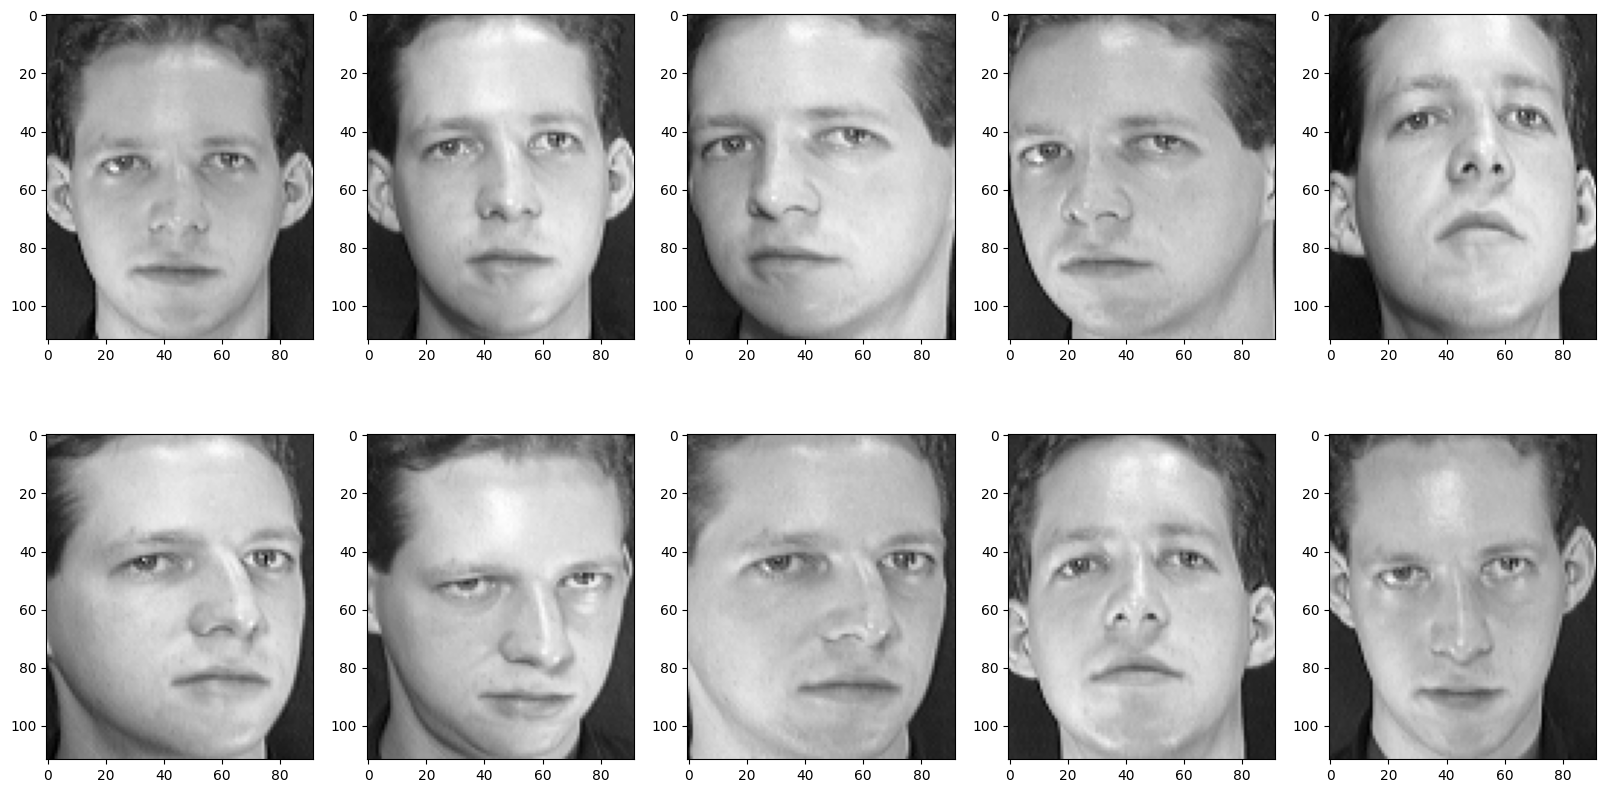

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    ax[i // 5, i % 5].imshow(dataset[0][i], cmap='gray')

In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data.shape, test_data.shape

((32, 10, 112, 92), (8, 10, 112, 92))

In [ ]:
h, w = train_data.shape[2:]

train_data = train_data.reshape(-1, h * w)
test_data = test_data.reshape(-1, h * w)

In [ ]:
train_data.shape, test_data.shape

((320, 10304), (80, 10304))

---

## PCA

In [ ]:
n_components = 100

In [ ]:
pca = PCA(n_components = n_components)
train_pca = pca.fit_transform(train_data)
test_pca = pca.transform(test_data)

In [ ]:
train_pca.shape, test_pca.shape, pca.components_.shape

((320, 100), (80, 100), (100, 10304))

In [ ]:
eigenfaces = pca.components_.reshape((n_components, h, w))

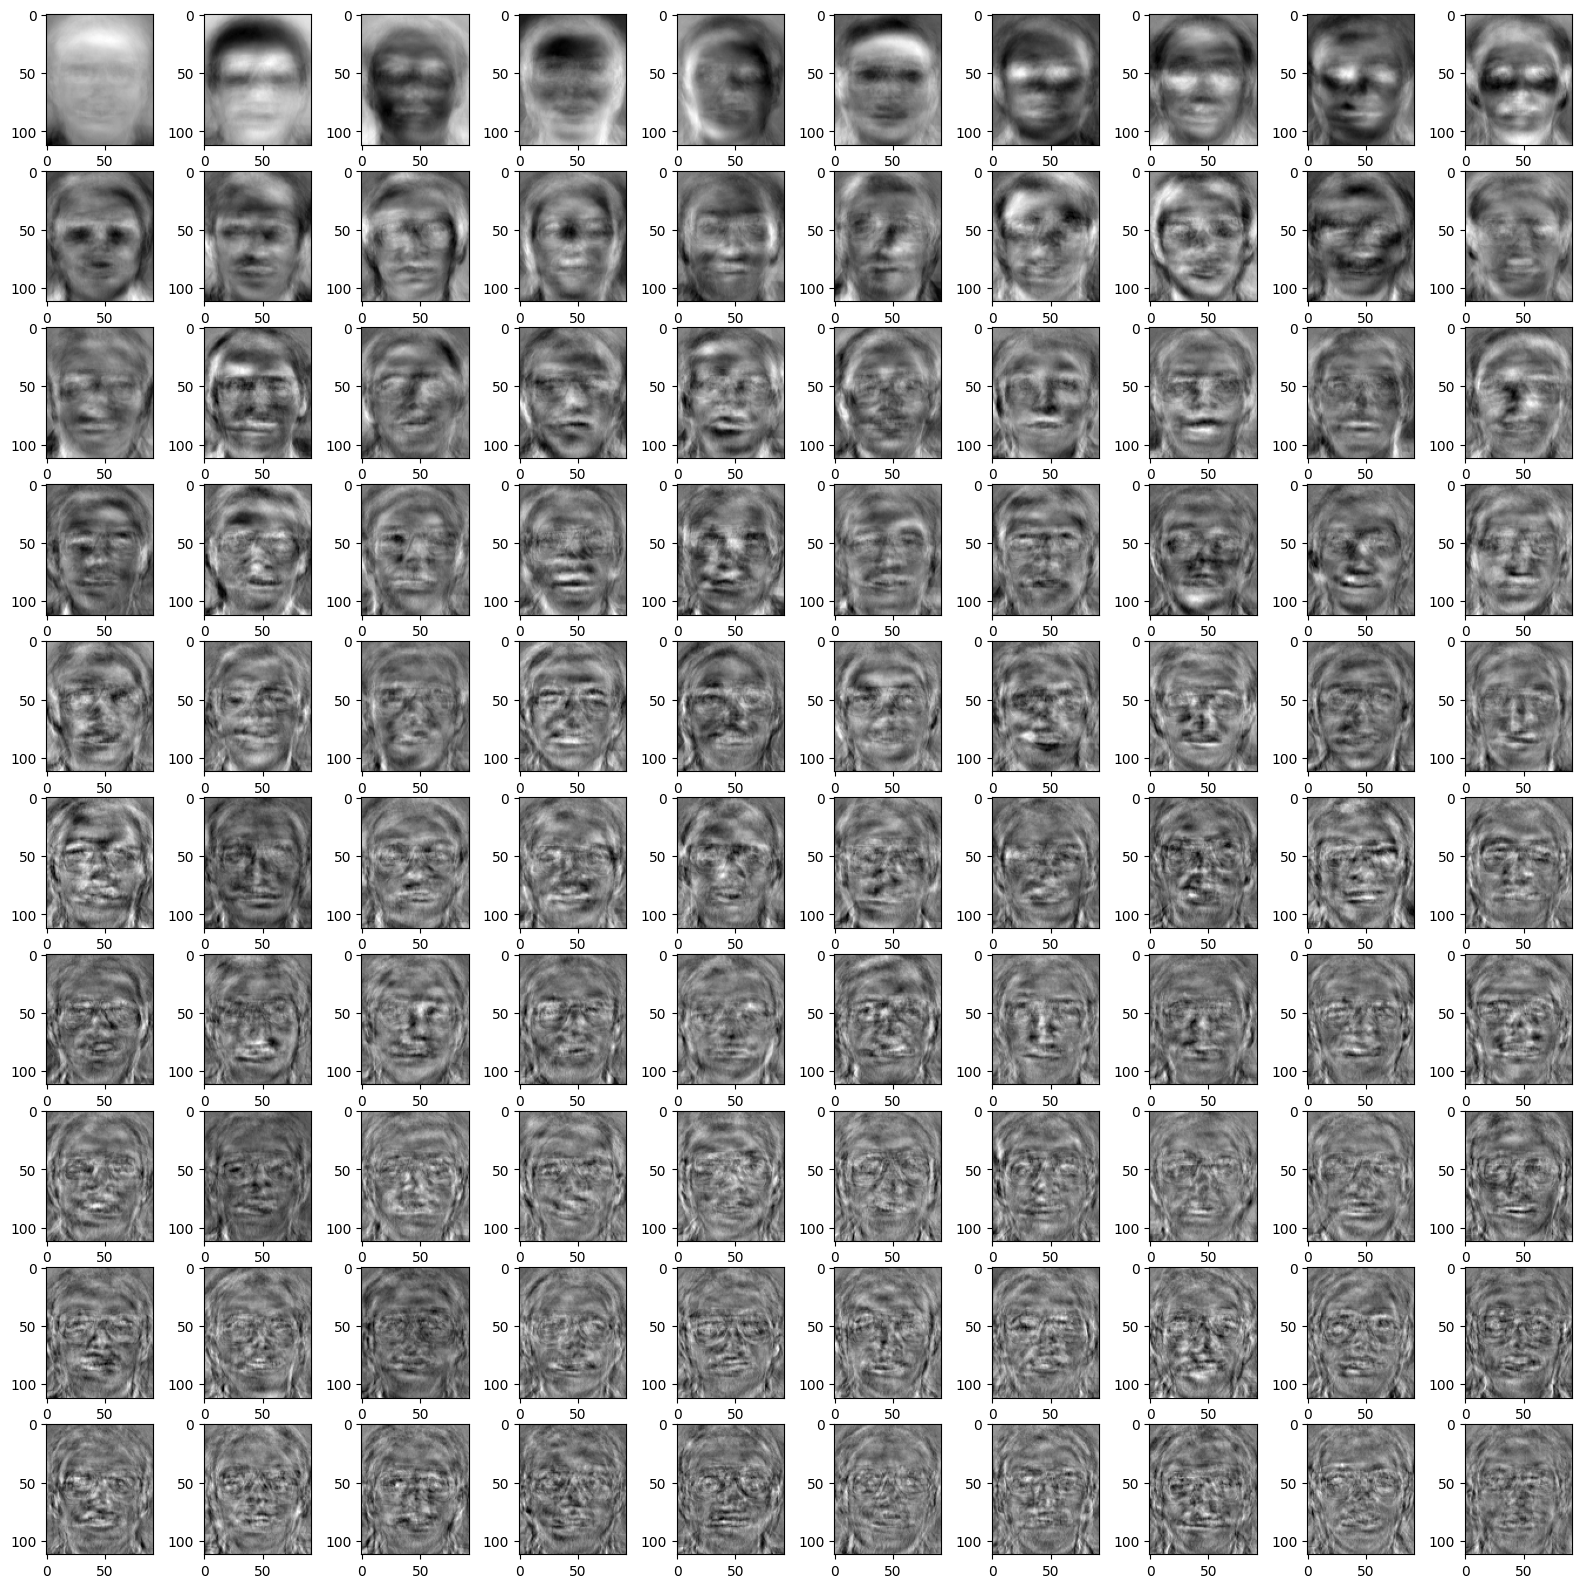

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(100):
    ax[i // 10, i % 10].imshow(eigenfaces[i], cmap='gray')

---

## 人脸重建

In [ ]:
import random
random.seed(42)

In [ ]:
random_index = random.sample(range(test_data.shape[0]), 5)
random_index

[14, 3, 35, 31, 28]

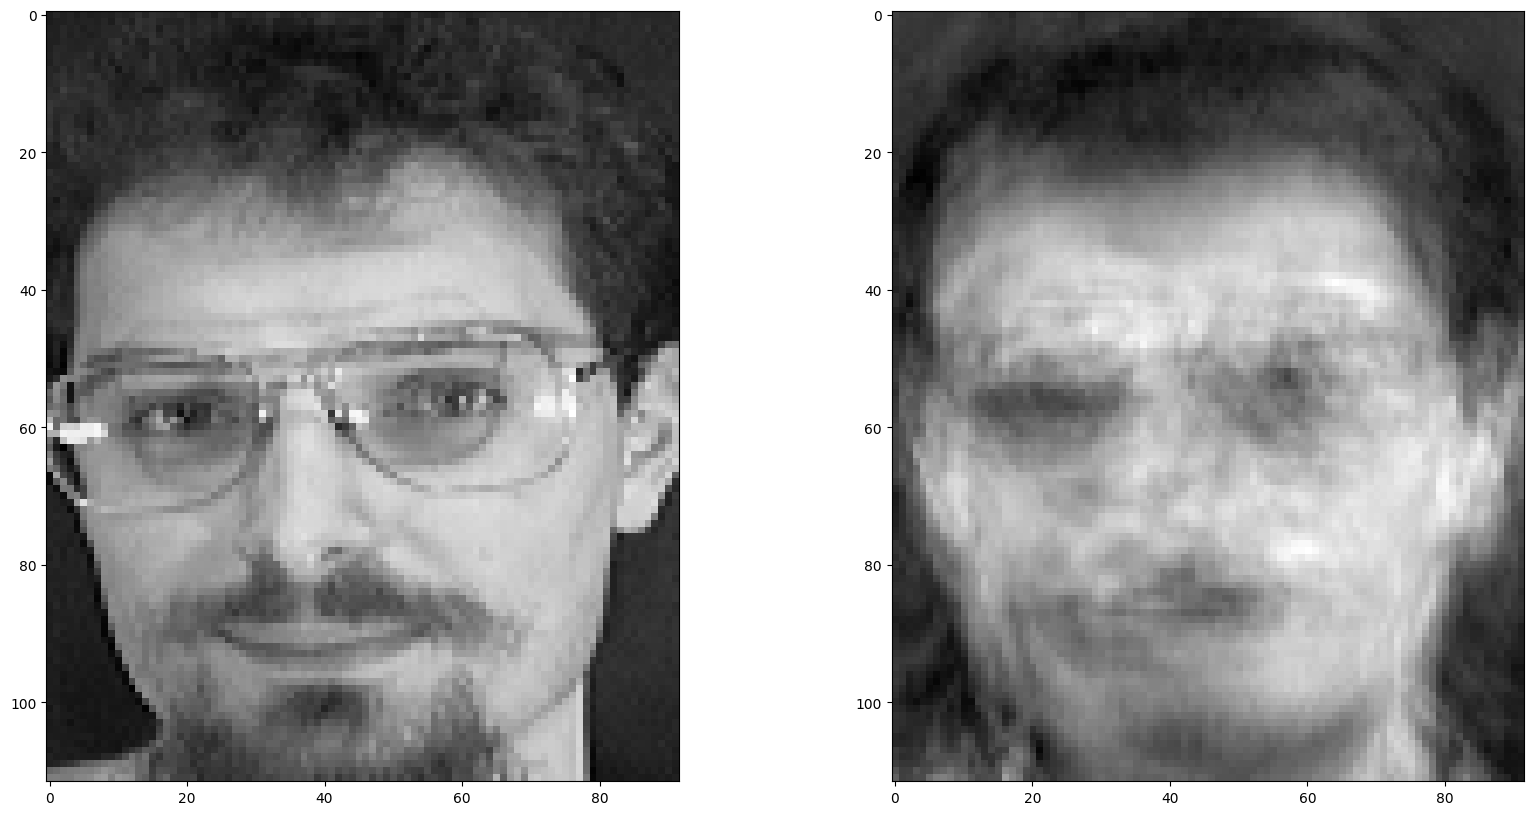

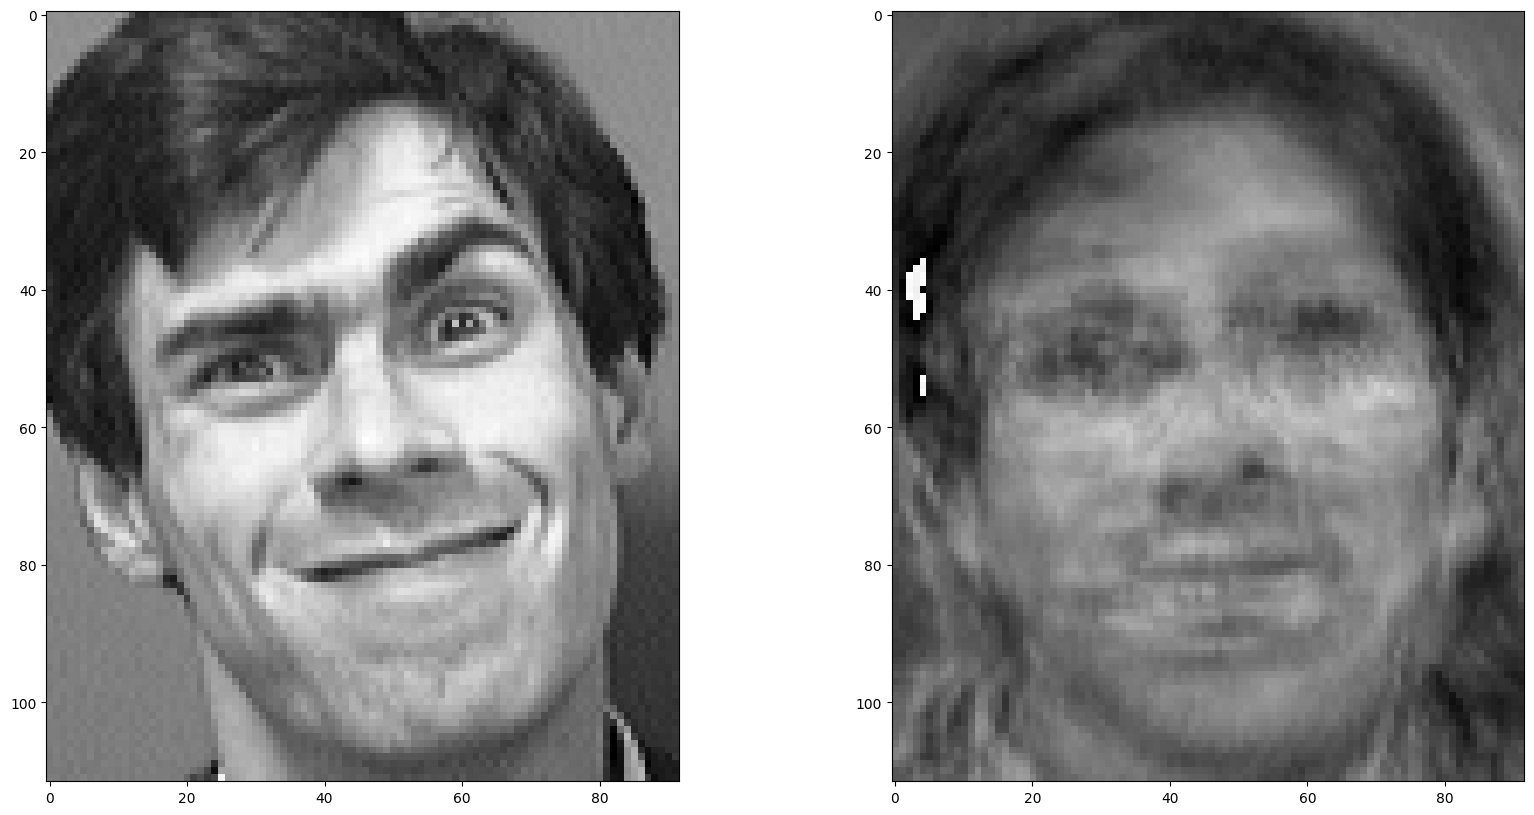

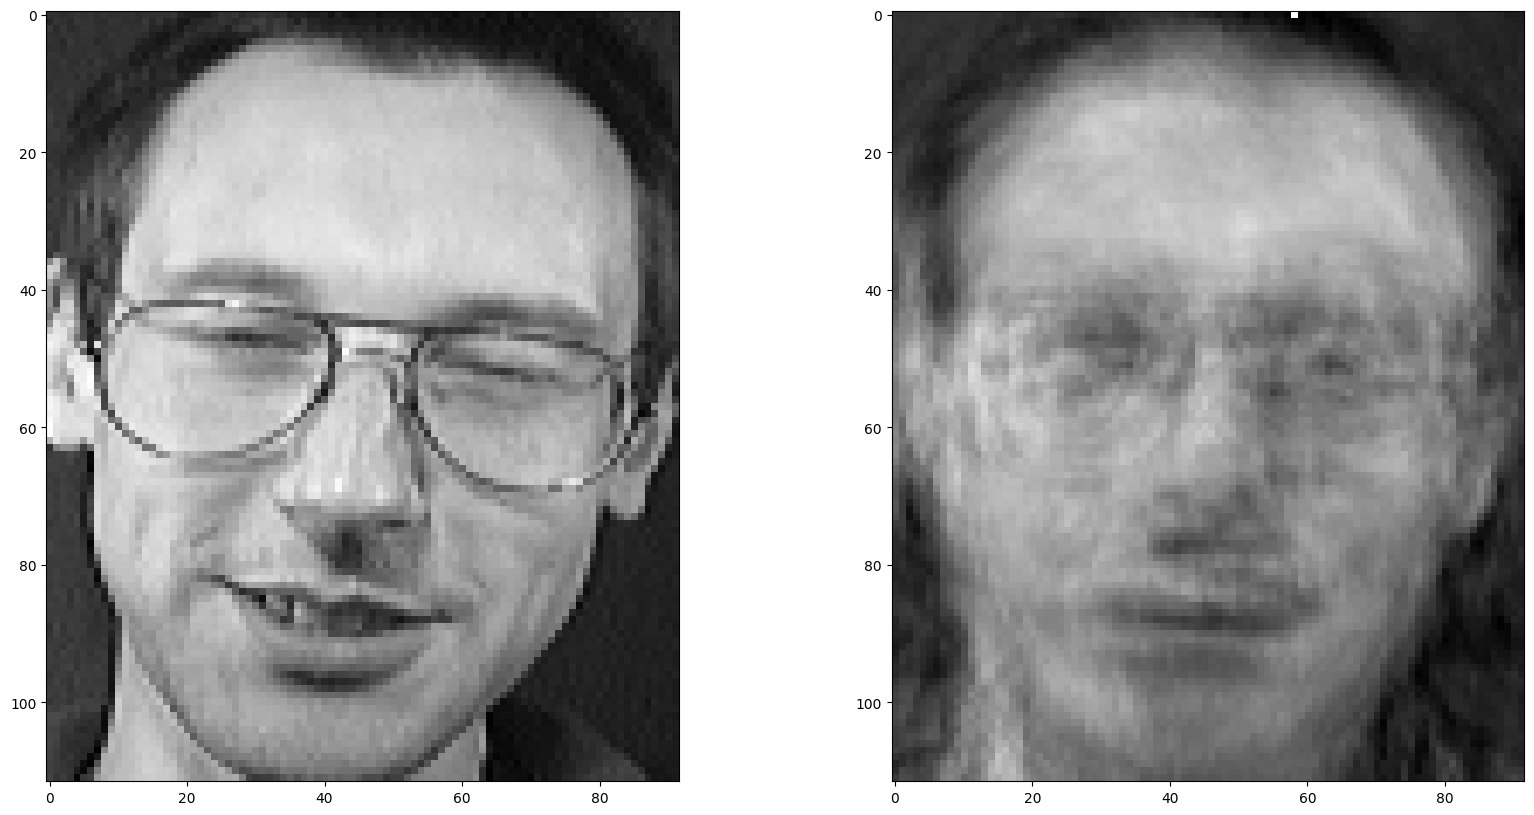

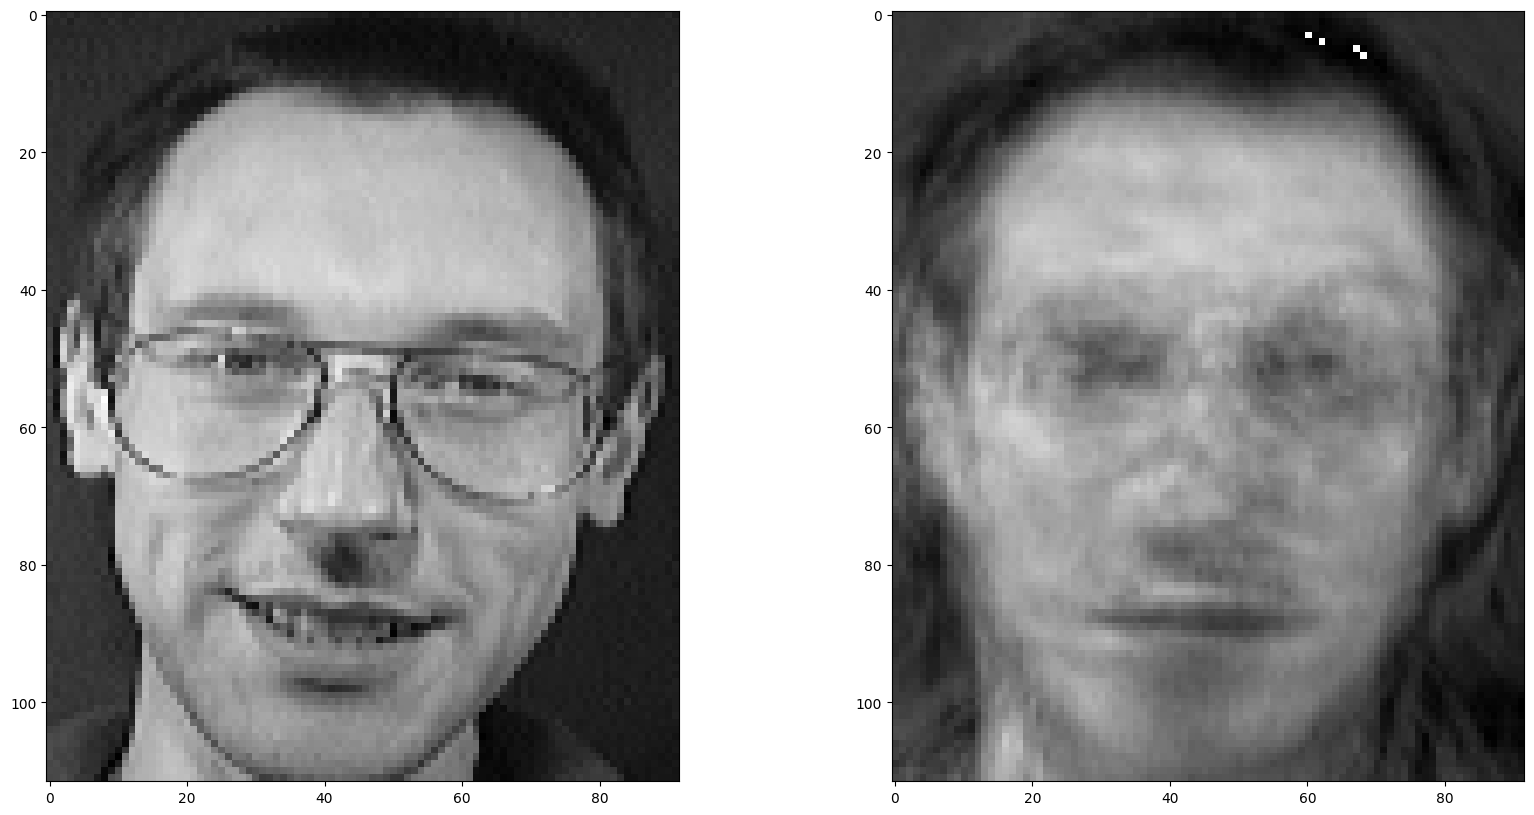

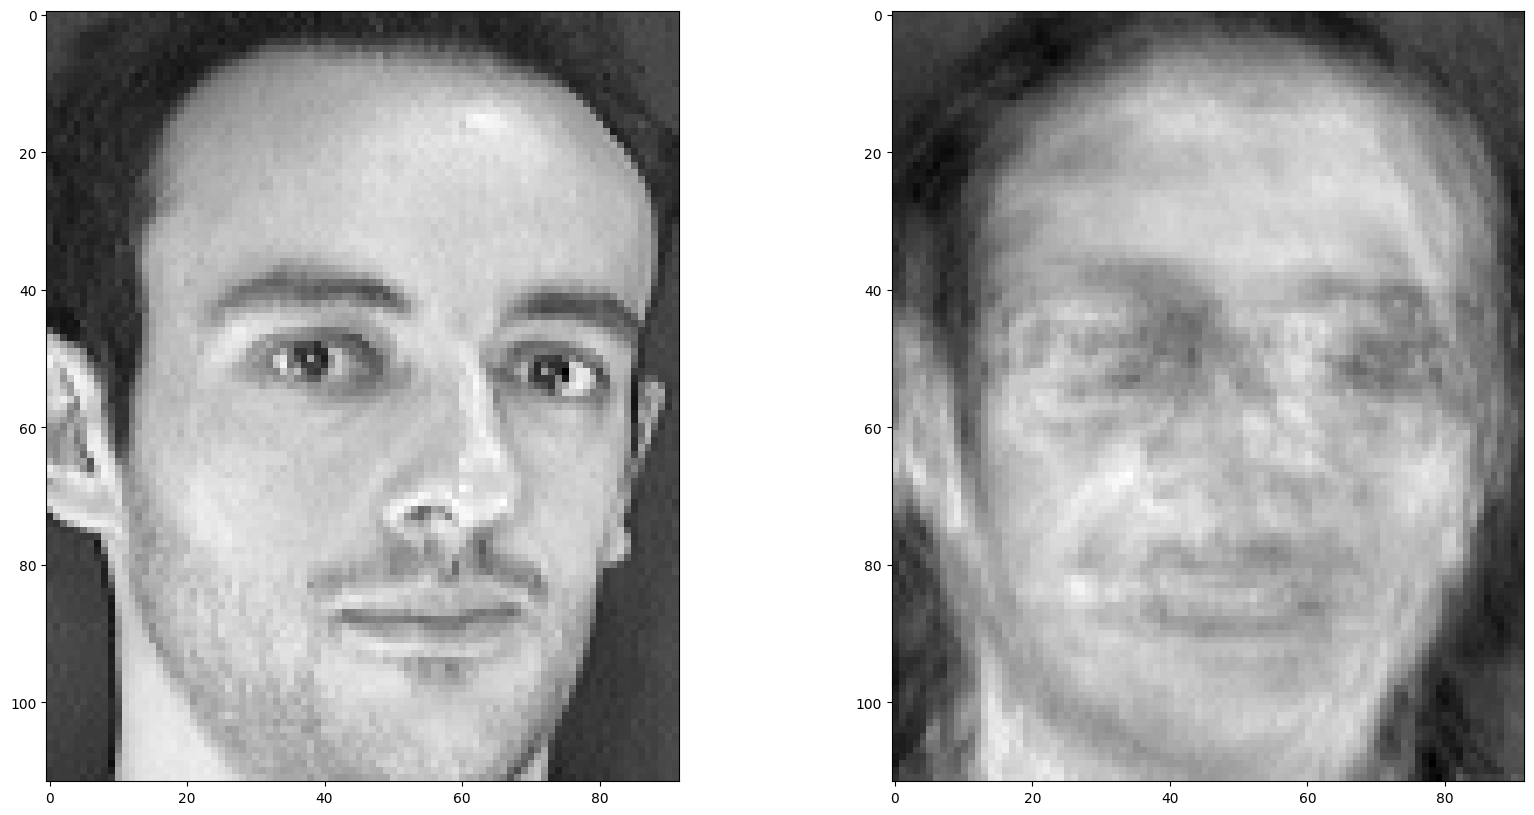

In [ ]:
for i in random_index:
    reconstructed_face = pca.inverse_transform(test_pca[i]).reshape((h, w)).astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(test_data[i].reshape((h, w)), cmap='gray')
    ax[1].imshow(reconstructed_face, cmap='gray')

plt.show()

---

## PCA 解释比

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

array([0.17609403, 0.13700644, 0.06733115, 0.05877175, 0.05176274,
       0.03554961, 0.02526374, 0.02394288, 0.01943733, 0.01894701,
       0.01483616, 0.01370482, 0.01155772, 0.01090926, 0.01059307,
       0.0098871 , 0.00871664, 0.00773196, 0.00753579, 0.00724637,
       0.00673099, 0.00652659, 0.00607843, 0.00569583, 0.00535174,
       0.00506177, 0.00487192, 0.0046087 , 0.00445851, 0.00433735,
       0.00423295, 0.00410522, 0.00399718, 0.00368998, 0.00361576,
       0.00348939, 0.00340238, 0.00328998, 0.00316469, 0.00307433,
       0.00294676, 0.00286099, 0.0027819 , 0.00270013, 0.00265174,
       0.0025884 , 0.00256395, 0.00248368, 0.00234902, 0.00232843,
       0.00226628, 0.00220034, 0.00214706, 0.00210488, 0.002029  ,
       0.00193498, 0.0019198 , 0.0018601 , 0.00184473, 0.00180601,
       0.00177383, 0.00173615, 0.00169681, 0.00167216, 0.00165059,
       0.00161941, 0.00158653, 0.00158475, 0.00154833, 0.00153342,
       0.00149257, 0.00146986, 0.00144162, 0.00142301, 0.00140

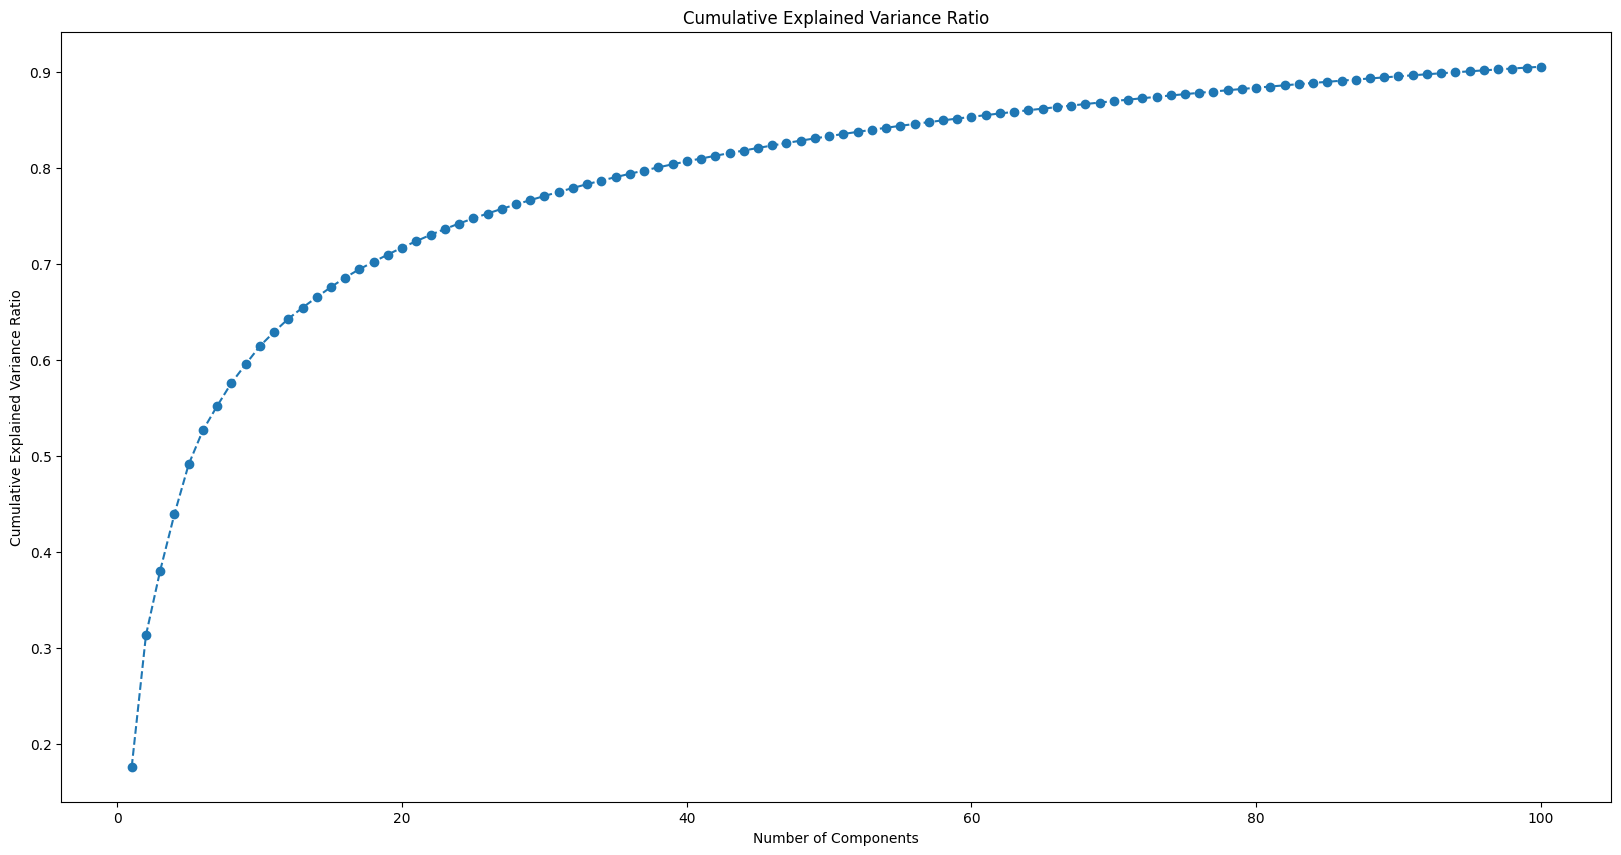

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.plot(range(1, len(ratio) + 1), np.cumsum(ratio), marker='o', linestyle='--')

---

## KNN 训练

In [ ]:
n_components = 150

In [ ]:
pca_new = PCA(n_components = n_components)
train_pca_new = pca_new.fit_transform(train_data)

In [ ]:
train_labels = np.array([i // 10 for i in range(train_data.shape[0])])

In [ ]:
train_acc = []

for i in range(n_components):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_pca[:, :i+1], train_labels)
    train_acc.append(knn.score(train_pca[:, :i+1], train_labels))

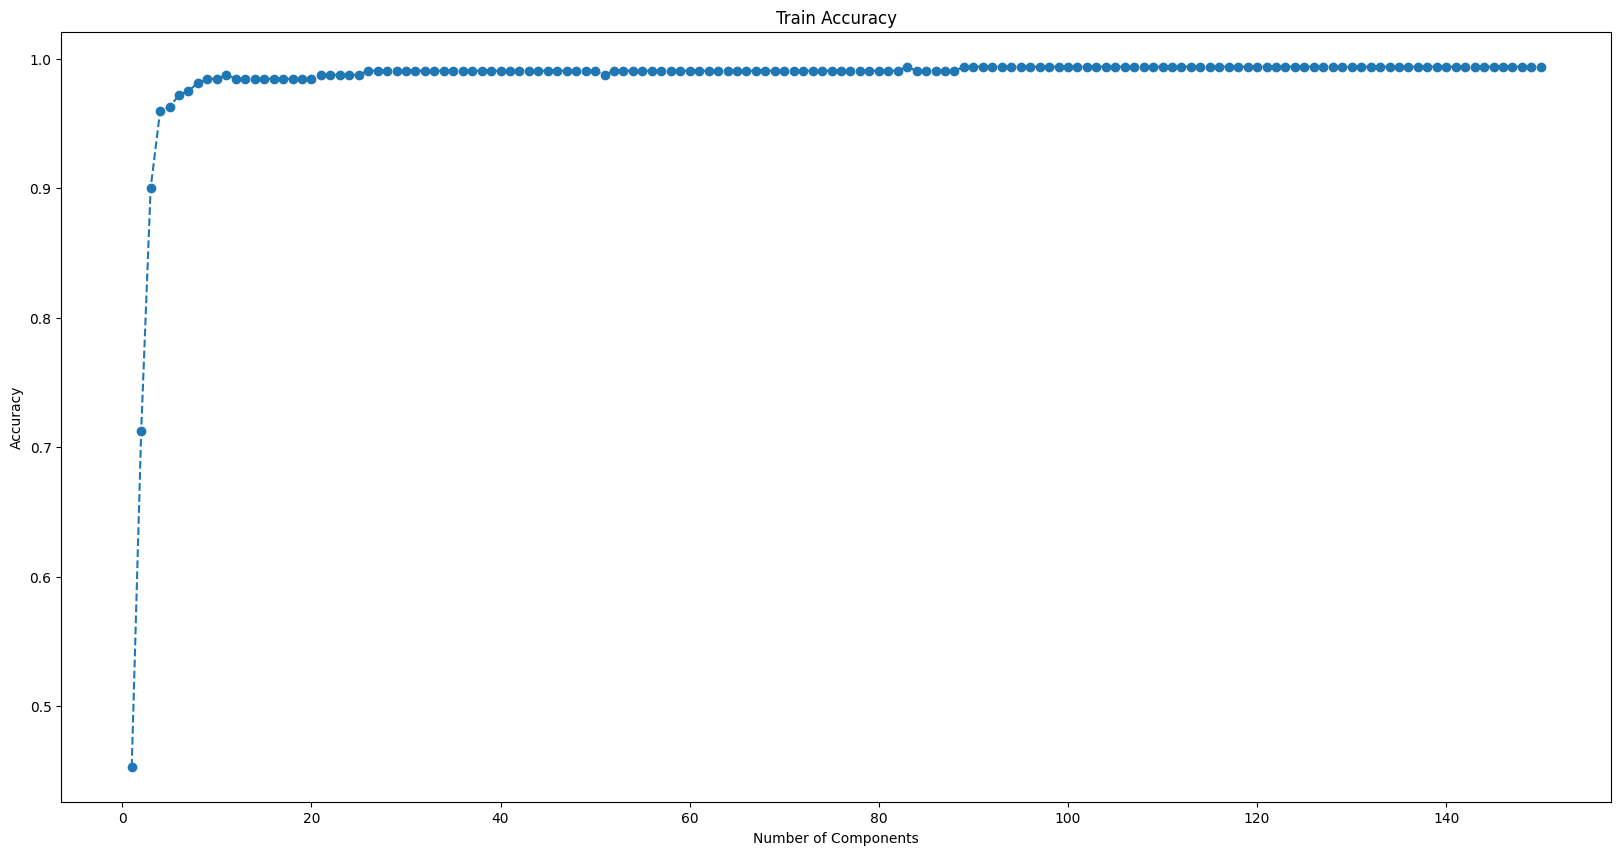

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title('Train Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.plot(range(1, len(train_acc) + 1), train_acc, marker='o', linestyle='--')